<h1>Heart Disease Prediction</h1>

<h3>Importing libraries</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3>Importing Dataset</h3>

In [3]:
dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:, :11].values
Y = dataset.iloc[:, -1].values

<h3>Data Preprocessing</h3>

In [12]:
#to transform non-numerical labels to numerical labels.
from sklearn.preprocessing import LabelEncoder
#column in index 1
sex = LabelEncoder()
X[:, 1] = sex.fit_transform(X[:, 1])

#column in index 2
ChestPainType = LabelEncoder()
X[:, 2] = ChestPainType.fit_transform(X[:, 2])

#column in index 6
RestingECG = LabelEncoder()
X[:, 6] = RestingECG.fit_transform(X[:, 6])

#column in index 8
ExerciseAngina = LabelEncoder()
X[:, 8] = ExerciseAngina.fit_transform(X[:, 8])

#column in index 10
ST_Slope = LabelEncoder()
X[:, 10] = ST_Slope.fit_transform(X[:, 10])

In [14]:
#check the dataset after beeing encoded
print(X)

[[40 1 1 ... 0 0.0 2]
 [49 0 2 ... 0 1.0 1]
 [37 1 1 ... 0 0.0 2]
 ...
 [57 1 0 ... 1 1.2 1]
 [57 0 1 ... 0 0.0 1]
 [38 1 2 ... 0 0.0 2]]


<h3>Splitting Dataset into Trainning and Test set</h3>

In [16]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0)

<h3>Feature Scaling</h3>

In [21]:
#to tranform the dataset in a definite range (reduce the variation)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.fit_transform(X_Test)

In [22]:
print(X_Train)

[[ 1.75354017  0.51740017 -0.82686398 ...  1.19939076  1.0553738
  -0.59357258]
 [-0.81787111  0.51740017 -0.82686398 ...  1.19939076  0.57784676
  -0.59357258]
 [ 1.21782949 -1.93273999  1.27683849 ... -0.83375663 -0.0906911
   1.0443307 ]
 ...
 [ 0.3606924  -1.93273999 -0.82686398 ... -0.83375663 -0.85473437
   1.0443307 ]
 [ 1.11068735  0.51740017 -0.82686398 ...  1.19939076  2.96548197
  -2.23147586]
 [-0.71072897  0.51740017  1.27683849 ... -0.83375663 -0.85473437
   1.0443307 ]]


<h3>Trainning Dataset</h3>

In [23]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_Train, Y_Train)

LogisticRegression()

In [28]:
#support vector machine
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_Train, Y_Train)

SVC()

In [29]:
Y_Pred_Log = logistic_model.predict(X_Test)
Y_Pred_SVM = svm_model.predict(X_Test)

<h3>Testing accuracy</h3>

In [34]:
#Logistic accuracy
from sklearn.metrics import accuracy_score
Logistic_acc = accuracy_score(Y_Test, Y_Pred_Log)
print(Logistic_acc)

0.8369565217391305


In [35]:
#SVM accuracy
SVM_accuracy = accuracy_score(Y_Test, Y_Pred_SVM)
print(SVM_accuracy)

0.8641304347826086


<h3>Visualizing the accuracy</h3>

Text(0, 0.5, 'Accuracy')

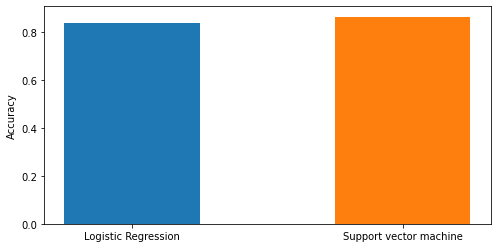

In [41]:
plt.figure(figsize=(8, 4))
plt.bar("Logistic Regression", Logistic_acc, width=0.5)
plt.bar("Support vector machine", SVM_accuracy, width=0.5)
plt.ylabel("Accuracy")

<h3>Single Prediction</h3>

In [44]:
# age = 50, sex = F, chestpain = ASY, RestingBP = 105, cholestrol = 250, FastingBS = 1, 
# RestingECG = ST, MaxHR = 175, ExerciseAngina = Y, oldpeak = 1.9, ST_Slope = Down
result = svm_model.predict(sc.transform([[50, 0, 0, 105, 250, 1, 2, 175, 1, 1.9, 0]]))
if result == [1]:
    print("Person has heart disease")
else:
    print("Person doesn't have disease")

Person has heart disease
